In [ ]:
pip install selenium

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
import requests

In [ ]:
# 사이트 끌고 오기
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube'
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
channel_list = soup.select('form > table > tbody > tr')

for channel in channel_list:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text
channel_list

In [22]:
# 다른 페이지 데이터
results = []
for page in range(1,2):
    url = f'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    requests.get(url)
    time.sleep(2)  # 2초 동안 기다림
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')

    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip()
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results.append(data)


In [ ]:
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./youtube_rank.xlsx', index = False)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

# 그래프에서 한글을 표기하기 위해 글꼴 변경
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
elif platform.system() == 'Darwin':   # macOS
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')

Check your OS system


In [48]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (23.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and dir

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_excel('./youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],8950만,319억1916만,534개
1,BANGTANTV,[음악/댄스/가수],7550만,207억3039만,"2,249개"
2,HYBE LABELS,[음악/댄스/가수],7100만,284억1408만,"1,303개"
3,SMTOWN,[음악/댄스/가수],3180만,272억3929만,"4,142개"
4,JYP Entertainment,[음악/댄스/가수],2730만,197억4945만,"1,716개"


In [51]:
df['replaced_subscriber'] = df['subscriber'].str.replace('만','0000')   # 숫자 타입으로 변환
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')   # 그래프 시각화를 위함
df

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],8950만,319억1916만,534개,89500000
1,BANGTANTV,[음악/댄스/가수],7550만,207억3039만,"2,249개",75500000
2,HYBE LABELS,[음악/댄스/가수],7100만,284억1408만,"1,303개",71000000
3,SMTOWN,[음악/댄스/가수],3180만,272억3929만,"4,142개",31800000
4,JYP Entertainment,[음악/댄스/가수],2730만,197억4945만,"1,716개",27300000
...,...,...,...,...,...,...
95,MBCdrama,[TV/방송],496만,58억2318만,"60,522개",4960000
96,떵개떵,[음식/요리/레시피],491만,30억1588만,"4,964개",4910000
97,ToyMart TV,[키즈/어린이],486만,19억9634만,720개,4860000
98,매일맛나 delicious day,[미분류],485만,5억0362만,342개,4850000


In [52]:
pivot_df = df.pivot_table(index='category', values='replaced_subscriber',aggfunc=['sum','count'])
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df = pivot_df.reset_index()
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
6,[음악/댄스/가수],628370000,38
7,[키즈/어린이],208490000,23
5,[음식/요리/레시피],101790000,11
1,[TV/방송],89770000,11
3,[미분류],71400000,7


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50501 (\N{HANGUL SYLLABLE AG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45828 (\N{HANGUL SYLLABLE DAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

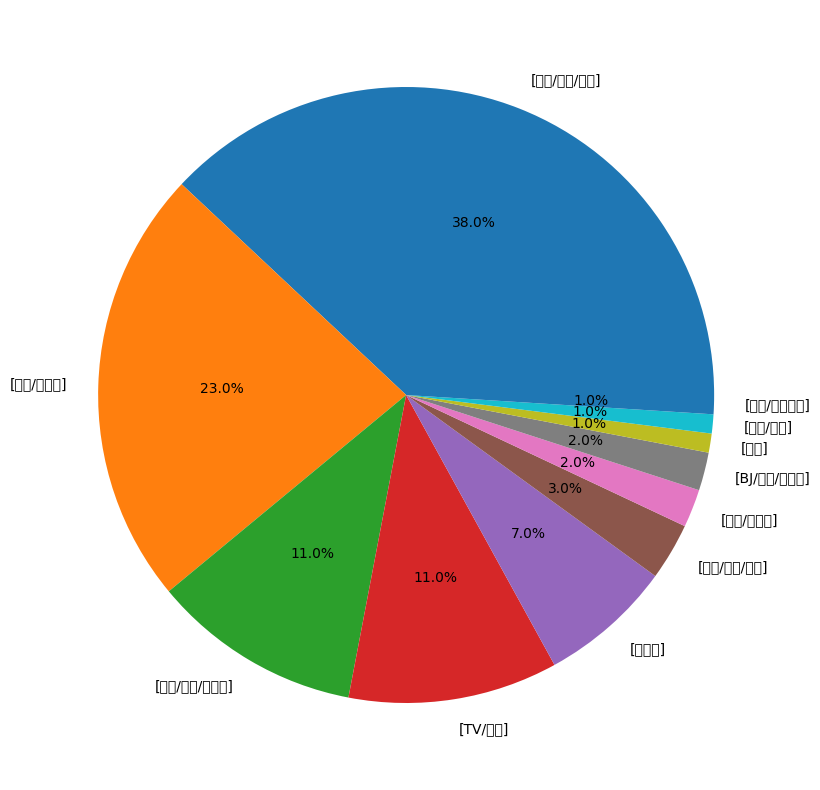

In [54]:
plt.figure(figsize = (30, 10))
plt.pie(pivot_df['category_count'], labels = pivot_df['category'], autopct='%1.1f%%')
plt.show()